In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import time

In [6]:
file_names_3g = glob("data/3g/*")
file_names_4g = glob("data/4g/*")
for i, j in zip(file_names_3g, file_names_4g):
    print(i, j)

data/3g\szsjsignaldata3_zh_01.csv data/4g\szsjsignaldata4_zh_01.csv
data/3g\szsjsignaldata3_zh_02.csv data/4g\szsjsignaldata4_zh_02.csv
data/3g\szsjsignaldata3_zh_03.csv data/4g\szsjsignaldata4_zh_03.csv
data/3g\szsjsignaldata3_zh_04.csv data/4g\szsjsignaldata4_zh_04.csv
data/3g\szsjsignaldata3_zh_05.csv data/4g\szsjsignaldata4_zh_05.csv
data/3g\szsjsignaldata3_zh_06.csv data/4g\szsjsignaldata4_zh_06.csv
data/3g\szsjsignaldata3_zh_07.csv data/4g\szsjsignaldata4_zh_07.csv
data/3g\szsjsignaldata3_zh_08.csv data/4g\szsjsignaldata4_zh_08.csv
data/3g\szsjsignaldata3_zh_09.csv data/4g\szsjsignaldata4_zh_09.csv
data/3g\szsjsignaldata3_zh_10.csv data/4g\szsjsignaldata4_zh_10.csv
data/3g\szsjsignaldata3_zh_11.csv data/4g\szsjsignaldata4_zh_11.csv
data/3g\szsjsignaldata3_zh_12.csv data/4g\szsjsignaldata4_zh_12.csv
data/3g\szsjsignaldata3_zh_13.csv data/4g\szsjsignaldata4_zh_13.csv
data/3g\szsjsignaldata3_zh_14.csv data/4g\szsjsignaldata4_zh_14.csv
data/3g\szsjsignaldata3_zh_15.csv data/4g\szsjsi

In [4]:
def fuzhu(x):
    hour, minute, sec = x.split('-')
    x = int(minute)
    if 0<=x <=15:
        d =  1
    elif 16<=x<=30:
        d =  2
    elif 31<=x<=45:
        d = 3
    elif 46<=x<=59:
        d = 4
    return f"{hour}-{d}"
def pre_process(df):
    df = df.dropna()
    df = df[df['月'] ==10]
    df['id'] = df.index
    df_sub_time = df['时间'].str.split('-', expand=True)
    df_sub_time.columns = ['hour', 'min', 'sec']
    df = pd.concat([df, df_sub_time], 1)
    df['num']= df['时间'].apply(fuzhu)
    return df

def get_data(df):
    df =  df.groupby(['年', '月', '日','num', '省', '市']).agg({'aa':lambda x: len(set(x))})
    return df

In [5]:
# columns = ['年', '月', '日','num', 'aa']
df = pd.DataFrame()
index_ = 15
for file_name_3, file_name_4  in zip(file_names_3g[14:], file_names_4g[14:]):
    print(file_name_3)
    cur_df_3g = pd.read_csv(file_name_3, delimiter='\t', names=['年', '月', '日', '时间', 'aa', '国家', '省', '市', '经度', '纬度', 'b', 'aaa', 'age', 'type'])
    cur_df_4g = pd.read_csv(file_name_4, delimiter='\t', names=['年', '月', '日', '时间', 'aa', '国家', '省', '市', '经度', '纬度', 'b', 'aaa', 'age', 'type'])
#     cur_df_3g = pd.read_csv(file_name_3, delimiter='\t', nrows=10000,names=['年', '月', '日', '时间', 'aa', '国家', '省', '市', '经度', '纬度', 'b', 'aaa', 'age', 'type'])
#     cur_df_4g = pd.read_csv(file_name_4, delimiter='\t', nrows=10000,names=['年', '月', '日', '时间', 'aa', '国家', '省', '市', '经度', '纬度', 'b', 'aaa', 'age', 'type'])
    cur_df = pd.concat([cur_df_3g, cur_df_4g], axis=0)
    cur_df = pre_process(cur_df)
    cur_df = get_data(cur_df)
#     print(cur_df)
    cur_df = cur_df.reset_index()
#     print(cur_df)
    df = pd.concat([df, cur_df], axis=0)
    index_ += 1
       
#     break
#     print(df)
#     if index_ ==31:
#         break
df

NameError: name 'file_names_3g' is not defined

In [3]:
df1 = pd.read_csv('shi_group_by_1_15.csv')
df2 = pd.read_csv("shi_group_by_5_31.csv")
df = pd.concat([df1, df2], axis=0)

FileNotFoundError: [Errno 2] File b'shi_group_by_1_15.csv' does not exist: b'shi_group_by_1_15.csv'

In [10]:
df

,年,月,日,num,省,市,aa
0,2020,10,1,00-1,广东,东莞,621
1,2020,10,1,00-1,广东,中山,1297
2,2020,10,1,00-1,广东,云浮,79
3,2020,10,1,00-1,广东,佛山,544
4,2020,10,1,00-1,广东,广州,3864
...,...,...,...,...,...,...,...
34889,2020,10,31,23-4,广东,珠海,14437
34890,2020,10,31,23-4,广东,肇庆,110
34891,2020,10,31,23-4,广东,茂名,164
34892,2020,10,31,23-4,广东,阳江,110


In [11]:
df = df.groupby(['省','市',  '年', '月', '日','num',]).agg({'aa':sum}).reset_index()
df

,省,市,年,月,日,num,aa
0,广东,东莞,2020,10,1,00-1,621
1,广东,东莞,2020,10,1,00-2,372
2,广东,东莞,2020,10,1,00-3,369
3,广东,东莞,2020,10,1,00-4,339
4,广东,东莞,2020,10,1,01-1,328
...,...,...,...,...,...,...,...
62491,广东,韶关,2020,10,31,22-4,71
62492,广东,韶关,2020,10,31,23-1,93
62493,广东,韶关,2020,10,31,23-2,78
62494,广东,韶关,2020,10,31,23-3,79


In [18]:
df_zhuhai = df[df['市'] == '珠海']
df_zhuhai

,省,市,年,月,日,num,aa
47616,广东,珠海,2020,10,1,00-1,30135
47617,广东,珠海,2020,10,1,00-2,17106
47618,广东,珠海,2020,10,1,00-3,14853
47619,广东,珠海,2020,10,1,00-4,14985
47620,广东,珠海,2020,10,1,01-1,15687
...,...,...,...,...,...,...,...
50587,广东,珠海,2020,10,31,22-4,17862
50588,广东,珠海,2020,10,31,23-1,18674
50589,广东,珠海,2020,10,31,23-2,17700
50590,广东,珠海,2020,10,31,23-3,16561


In [23]:
31*96

2976

In [25]:
df_zhuhai

,省,市,年,月,日,num,aa
47616,广东,珠海,2020,10,1,00-1,30135
47617,广东,珠海,2020,10,1,00-2,17106
47618,广东,珠海,2020,10,1,00-3,14853
47619,广东,珠海,2020,10,1,00-4,14985
47620,广东,珠海,2020,10,1,01-1,15687
...,...,...,...,...,...,...,...
50587,广东,珠海,2020,10,31,22-4,17862
50588,广东,珠海,2020,10,31,23-1,18674
50589,广东,珠海,2020,10,31,23-2,17700
50590,广东,珠海,2020,10,31,23-3,16561


In [60]:
df_zhuhai['hour'] = df_zhuhai['num'].str.split('-', expand=True)[0]
df_zhuhai = df_zhuhai[df_zhuhai['日']>=5]
df_zhuhai

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,省,市,年,月,日,num,aa,hour
48000,广东,珠海,2020,10,5,00-1,26982,00
48001,广东,珠海,2020,10,5,00-2,13865,00
48002,广东,珠海,2020,10,5,00-3,13449,00
48003,广东,珠海,2020,10,5,00-4,13055,00
48004,广东,珠海,2020,10,5,01-1,13147,01
...,...,...,...,...,...,...,...,...
50587,广东,珠海,2020,10,31,22-4,17862,22
50588,广东,珠海,2020,10,31,23-1,18674,23
50589,广东,珠海,2020,10,31,23-2,17700,23
50590,广东,珠海,2020,10,31,23-3,16561,23


D:\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


日
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
23    AxesSubplot(0.125,0.125;0.775x0.755)
24    AxesSubplot(0.125,0.125;0.775x0.755)
25    AxesSubplot(0.125,0.125;0.775x0.755)
26    AxesSubplot(0.125,0.125;0.775x0.755)
27    AxesSubplot(0.125,0.125;0.775x0.755)
28    Axe

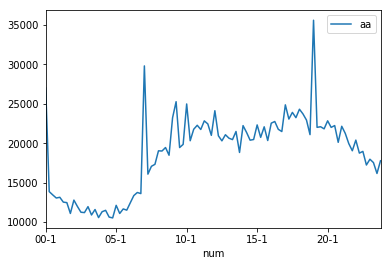

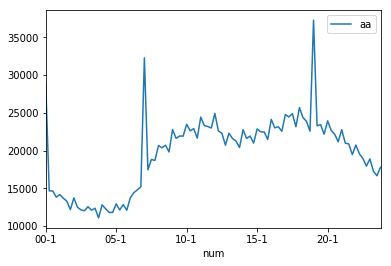

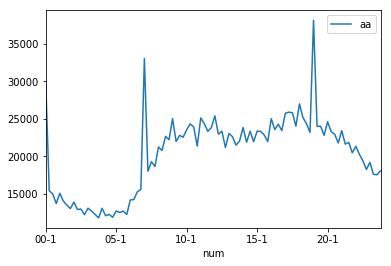

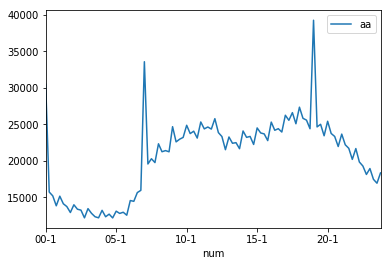

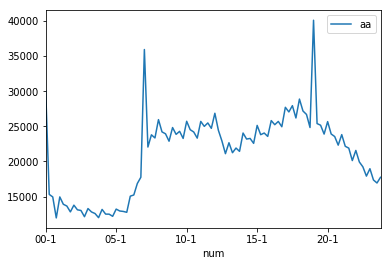

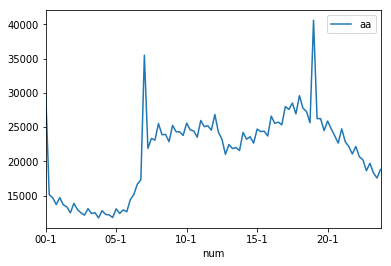

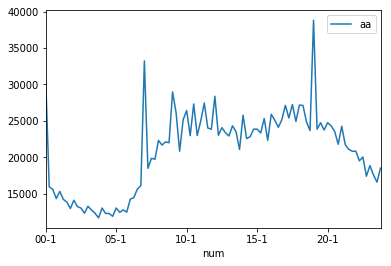

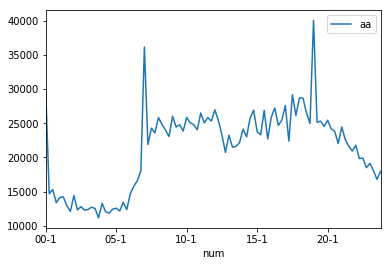

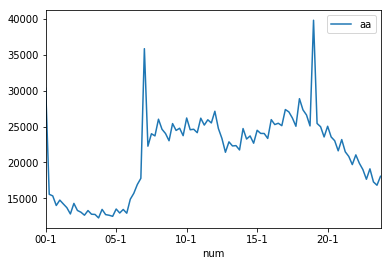

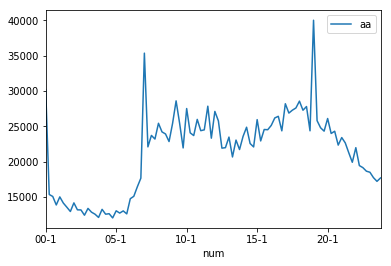

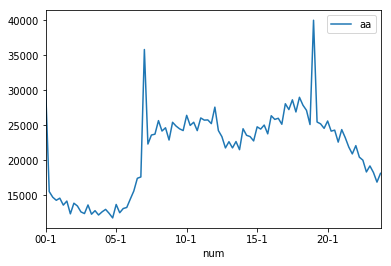

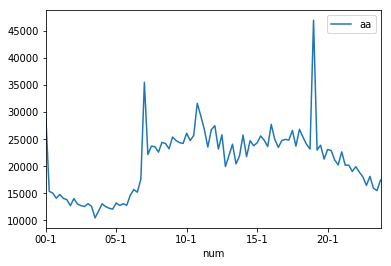

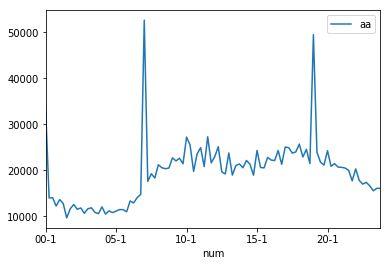

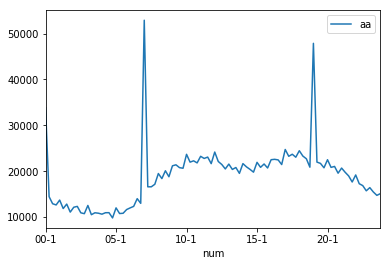

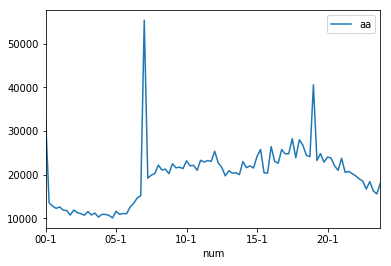

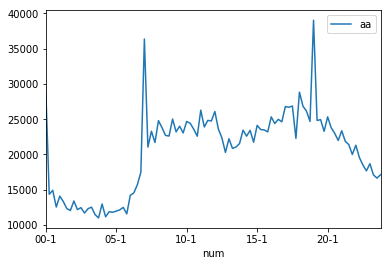

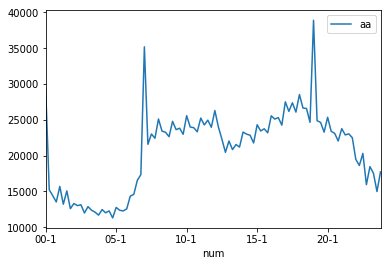

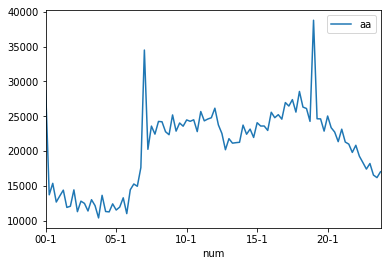

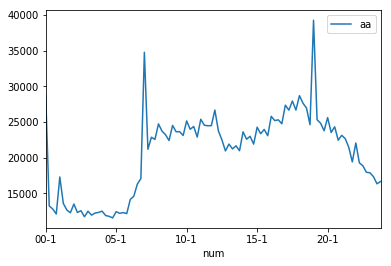

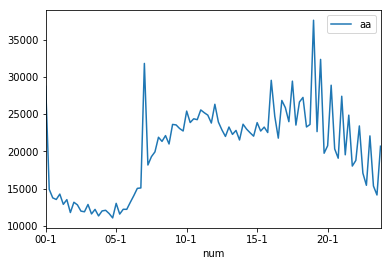

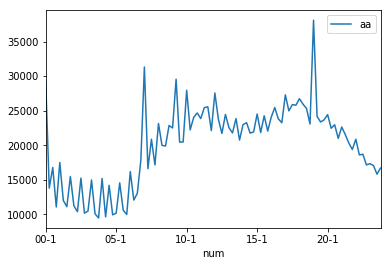

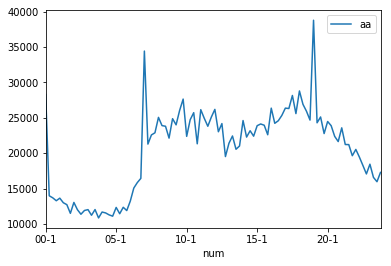

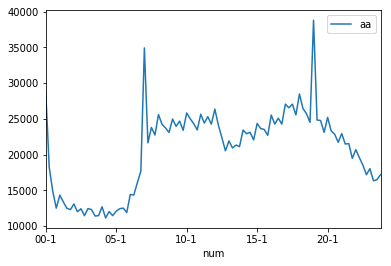

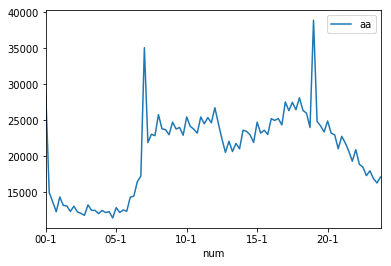

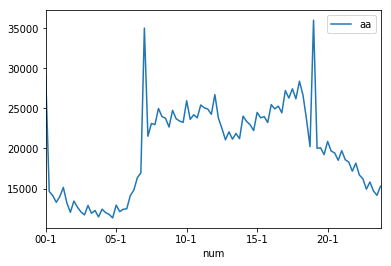

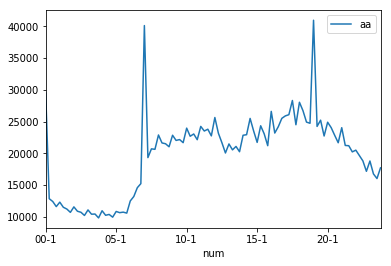

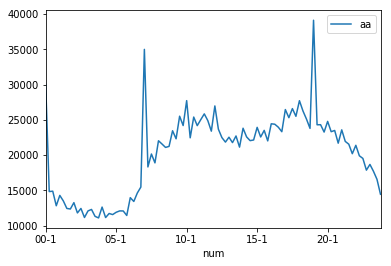

In [70]:
df_zhuhai.groupby('日').plot(y='aa',x='num')

In [73]:
df_hour = df_zhuhai.groupby(['hour', '日']).sum().reset_index()
df_hour

,hour,日,年,月,aa
0,00,5,8080,40,67351
1,00,6,8080,40,72051
2,00,7,8080,40,74054
3,00,8,8080,40,75192
4,00,9,8080,40,72311
...,...,...,...,...,...
643,23,27,8080,40,68079
644,23,28,8080,40,68329
645,23,29,8080,40,59952
646,23,30,8080,40,69259


hour
00    AxesSubplot(0.125,0.125;0.775x0.755)
01    AxesSubplot(0.125,0.125;0.775x0.755)
02    AxesSubplot(0.125,0.125;0.775x0.755)
03    AxesSubplot(0.125,0.125;0.775x0.755)
04    AxesSubplot(0.125,0.125;0.775x0.755)
05    AxesSubplot(0.125,0.125;0.775x0.755)
06    AxesSubplot(0.125,0.125;0.775x0.755)
07    AxesSubplot(0.125,0.125;0.775x0.755)
08    AxesSubplot(0.125,0.125;0.775x0.755)
09    AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
23    

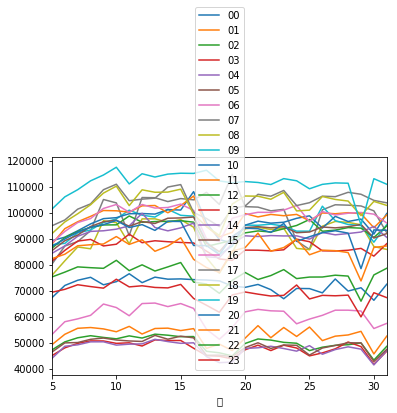

In [132]:
df_hour.set_index('日', inplace=True)
df_hour.groupby('hour')['aa'].plot(legend=True)

D:\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


hour
00    AxesSubplot(0.125,0.125;0.775x0.755)
01    AxesSubplot(0.125,0.125;0.775x0.755)
02    AxesSubplot(0.125,0.125;0.775x0.755)
03    AxesSubplot(0.125,0.125;0.775x0.755)
04    AxesSubplot(0.125,0.125;0.775x0.755)
05    AxesSubplot(0.125,0.125;0.775x0.755)
06    AxesSubplot(0.125,0.125;0.775x0.755)
07    AxesSubplot(0.125,0.125;0.775x0.755)
08    AxesSubplot(0.125,0.125;0.775x0.755)
09    AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
23    

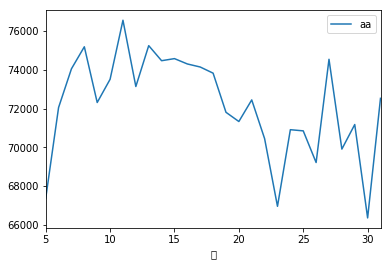

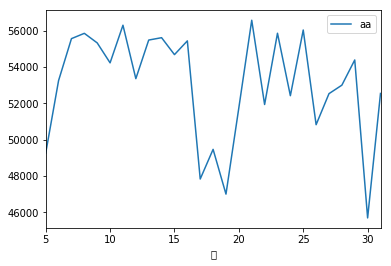

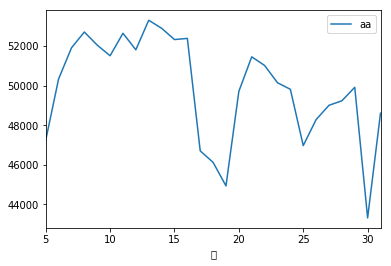

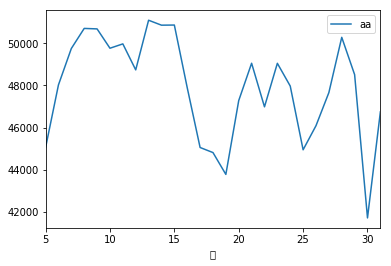

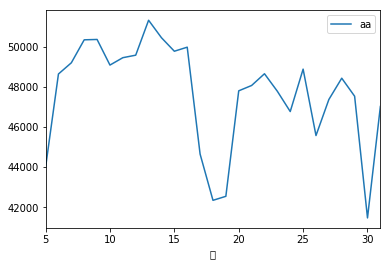

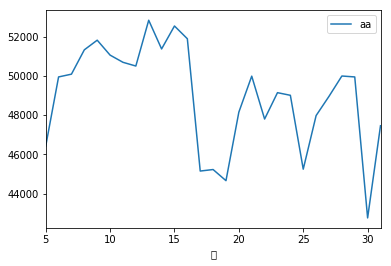

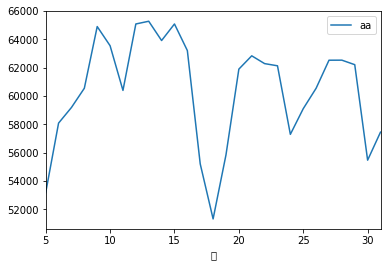

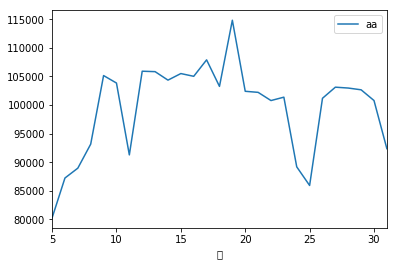

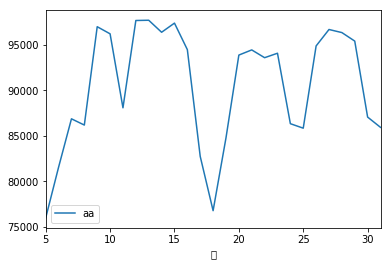

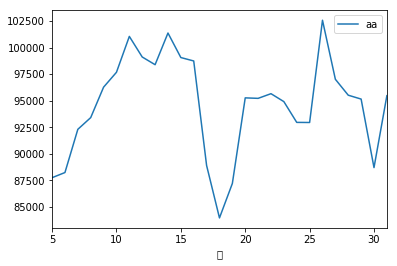

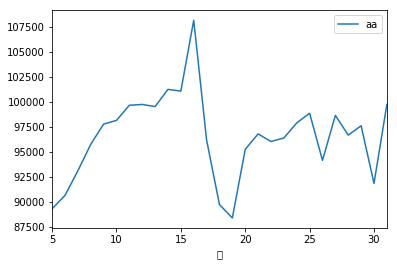

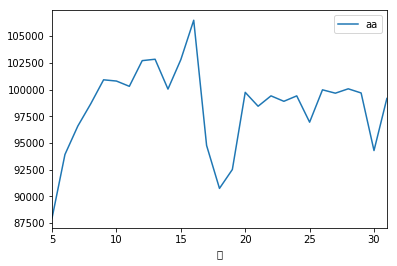

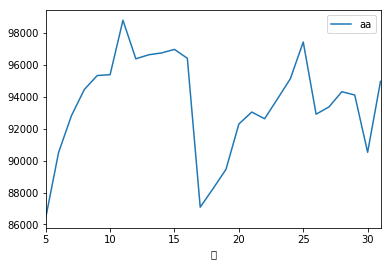

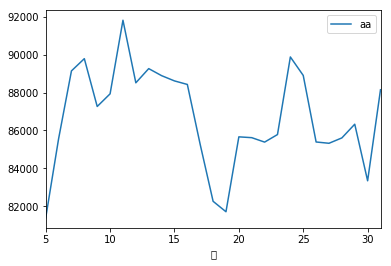

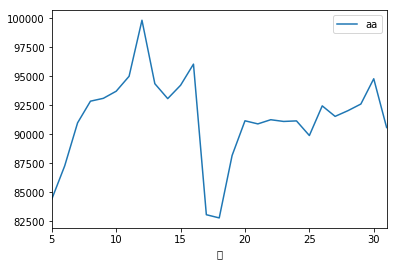

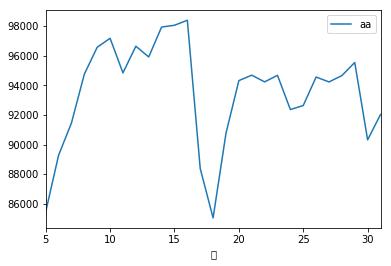

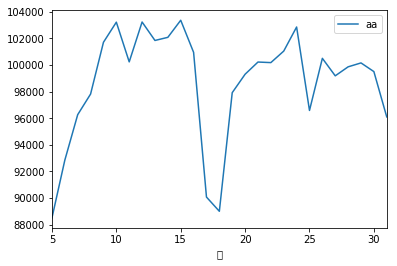

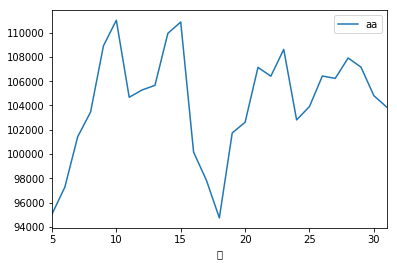

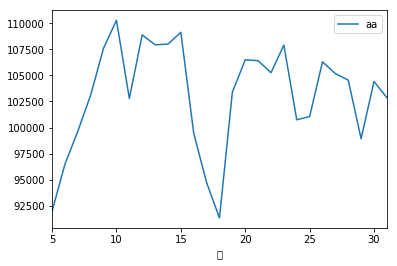

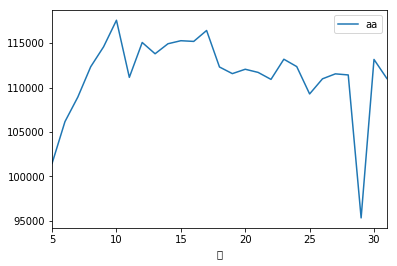

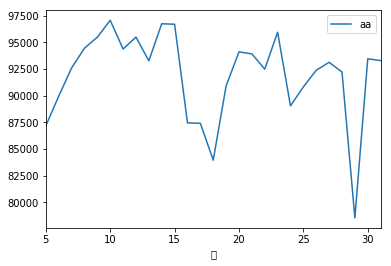

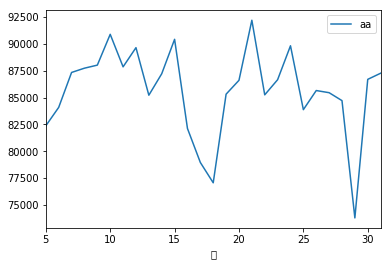

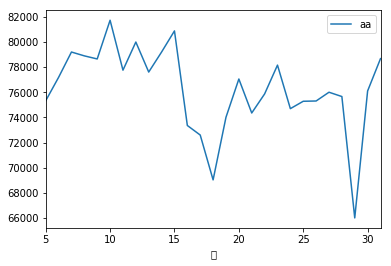

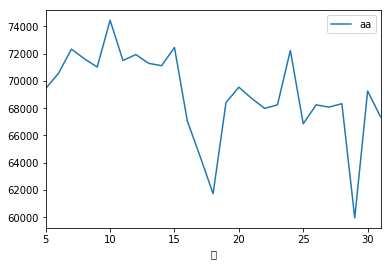

In [131]:
# with pd.plotting.plot_params.use('x_compat', True):
df_hour.groupby('hour').plot(x='日',y='aa', legend=True)

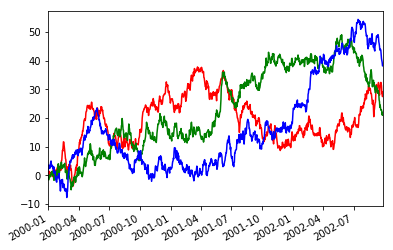

In [119]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000',periods=1000), columns=list('ABCD'))
df = df.cumsum()
with pd.plotting.plot_params.use('x_compat', True): #方法一
    df.A.plot(color='r')
    df.B.plot(color='g')
    df.C.plot(color='b')
plt.show()

    df = DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
    ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
    df.plot.scatter(x='c', y='d', color='Red', label='Group 2', ax=ax,s=100); #方法二ax，s控制点的大小
plt.show()

In [130]:
fig = plt.figure()
start = 0
# with pd.plotting.plot_params.use('x_compat', True):
for x in df_hour.groupby('hour'):
    x[1].index = range(27)
#         x[1].aa.plot(x='日',y='aa', label=x[0])
    ax = x[1].plot(x='日',y='aa', label=x[0], ax=ax)
#     print(1)
    start+=1
    if start>7:
        break
plt.show()

<Figure size 432x288 with 0 Axes>

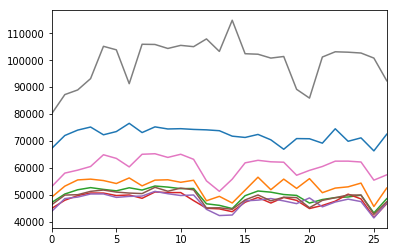

In [121]:
fig = plt.figure()
start = 0
# with pd.plotting.plot_params.use('x_compat', True):
    for x in df_hour.groupby('hour'):
        x[1].index = range(27)
    #     print(x[1]['日'].tolist())
    #     print(x[1]['aa'].to_list())
#         x[1].aa.plot(x='日',y='aa', label=x[0])
        x[1].aa.plot(label=x[0])
#         ax = x[1].plot(x='日',y='aa', fig=fig)
    #     plt.show()
        start+=1
        if start>7:
            break

In [ ]:
df_zhuhai.groupby('hour').plot(y='aa',x='num')

47616    30135
47617    17106
47618    14853
47619    14985
47712    27421
         ...  
50403    11598
50496    30022
50497    14822
50498    14875
50499    12808
Name: aa, Length: 124, dtype: int64


<function matplotlib.pyplot.legend(*args, **kwargs)>

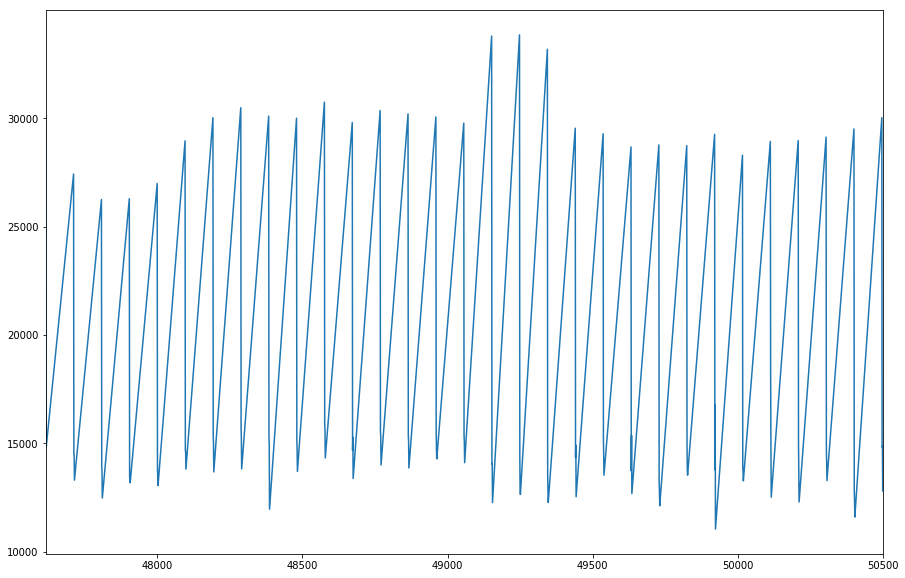

In [53]:
plt.figure(figsize=(15,10))
for hour in range(24):
#     for i in range(1, 5):
    df_time_label = df_zhuhai[df_zhuhai['num'] == f'{str(hour).zfill(2)}-{i}']
    df_time_label = df_zhuhai[df_zhuhai['num'].str.split('-', expand=True)[0]==str(hour).zfill(2)]
    print(df_time_label['aa'])
    df_time_label['aa'].plot()
#         print(df_time_label)
#         print(f'{hour}-{i}')

    break
plt.legend

In [30]:
df.sort_values(by=['市', '日', 'num']).reset_index()

,index,省,市,年,月,日,num,aa
0,0,广东,东莞,2020,10,1,00-1,621
1,1,广东,东莞,2020,10,1,00-2,372
2,2,广东,东莞,2020,10,1,00-3,369
3,3,广东,东莞,2020,10,1,00-4,339
4,4,广东,东莞,2020,10,1,01-1,328
...,...,...,...,...,...,...,...,...
62491,62491,广东,韶关,2020,10,31,22-4,71
62492,62492,广东,韶关,2020,10,31,23-1,93
62493,62493,广东,韶关,2020,10,31,23-2,78
62494,62494,广东,韶关,2020,10,31,23-3,79


In [9]:
df['num'].value_counts()

23-4    1281
23-3     777
23-2     731
23-1     719
22-4     705
        ... 
00-4     651
00-1     651
16-2     651
09-1     651
11-2     651
Name: num, Length: 96, dtype: int64

## 下面是模型训练部分

In [31]:
# df.to_csv('shi_group_by_1_31.csv', index=False)

In [64]:
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import time

In [38]:
def training_xgboost(train_data, train_y):
    model_xgb = xgb.XGBRegressor(max_depth=5
                                ,learning_rate=0.14
                                ,n_estimators=2000
                                ,n_jobs=-1)

    t1 = time.time()
    model_xgb.fit(train_data,train_y)
    print('training time:', str(int(time.time()-t1))+'s, ', end='')
    return model_xgb

def training_lightgbm(train_data, train_y):
    model_lgb = lgb.LGBMRegressor(num_leaves=20
                                ,max_depth=5
                                ,learning_rate=0.14
                                ,n_estimators=2000
                                ,n_jobs=-1)

    t1 = time.time()
    model_lgb.fit(train_data,train_y)
    print('training time:', str(int(time.time()-t1))+'s, ', end='')
    return model_lgb

In [ ]:
def feature_extraction(flow_data_in, split_day, area_embed=[], weekday=False, model='xgboost'):

    flow_data_in = pd.merge(flow_data_in, weather_df, on='day')  # +天气特征
    flow_data_in = pd.merge(flow_data_in, area_info[['id','area','type']], on='id')  # +区域面积和类型特征
    
    # graph embedding feature
    if len(area_embed) != 0:
        flow_data_in = pd.merge(flow_data_in, area_embed, on='id')  #+图潜入特征

    # if only weekday or not
    if weekday:
        flow_data_in = flow_data_in[flow_data_in['weekend'] == 0]
        if split_day >= 30 and model == 'xgboost':
            flow_data_in = flow_data_in[flow_data_in['day'] != 28] # notice: it's a bug !
    
    # history flow feature
    flow_data_in['flow_1db'] = [0]*1 + flow_data_in['flow'][:-1].tolist()
    flow_data_in['flow_2db'] = [0]*2 + flow_data_in['flow'][:-2].tolist()
    flow_data_in['flow_3db'] = [0]*3 + flow_data_in['flow'][:-3].tolist()
    flow_data_in['flow_3dba'] = flow_data_in[['flow_1db','flow_2db','flow_3db']].mean(axis=1)

    # yesterday feature
    flow_data_in['wea_1db'] = [0] + flow_data_in['wea_encoded'][:-1].tolist()
    flow_data_in['low_1db'] = [0] + flow_data_in['low'][:-1].tolist()
    flow_data_in['week_1db'] = [0] + flow_data_in['weekend'][:-1].tolist()

    # # type & id encode
    dict_type = dict(flow_data_in[flow_data_in['day']<split_day].groupby(['type']).mean()['flow'])  # 类型平均人口
    dict_id = dict(flow_data_in[flow_data_in['day']<split_day].groupby(['id']).mean()['flow'])  # 不分天 历史区域平均人口
    flow_data_in['type'] = flow_data_in['type'].map(dict_type)
    flow_data_in['id'] = flow_data_in['id'].map(dict_id)

    flow_data_out = flow_data_in[flow_data_in['day']>15]
    flow_data_out.drop(['weekday','high'],axis=1,inplace=True)
    
    return flow_data_out

In [34]:
def feature_extraction(flow_data_in):
    flow_data_in['flow_1db'] = [0]*1 + flow_data_in['flow'][:-1].tolist()
    flow_data_in['flow_2db'] = [0]*2 + flow_data_in['flow'][:-2].tolist()
    flow_data_in['flow_3db'] = [0]*3 + flow_data_in['flow'][:-3].tolist()
    flow_data_in['flow_3dba'] = flow_data_in[['flow_1db','flow_2db','flow_3db']].mean(axis=1)
    return flow_data_in

In [6]:
df = pd.read_csv('shi_group_by_1_31.csv')
df = df.sort_values(['市',  'num','日',])
df

FileNotFoundError: [Errno 2] File b'shi_group_by_1_31.csv' does not exist: b'shi_group_by_1_31.csv'

In [104]:
df.groupby(['日']).sum().reset_index()[['日', 'aa']]

,日,aa
0,1,2580794
1,2,2420590
2,3,2398703
3,4,2406641
4,5,2499985
5,6,2597386
6,7,2654300
7,8,2689050
8,9,2755110
9,10,2790393


In [217]:
df_plot = df.groupby(['日']).sum().reset_index()[['日', 'aa']]
df_plot

,日,aa
0,1,2580794
1,2,2420590
2,3,2398703
3,4,2406641
4,5,2499985
5,6,2597386
6,7,2654300
7,8,2689050
8,9,2755110
9,10,2790393


AttributeError: Unknown property xticks

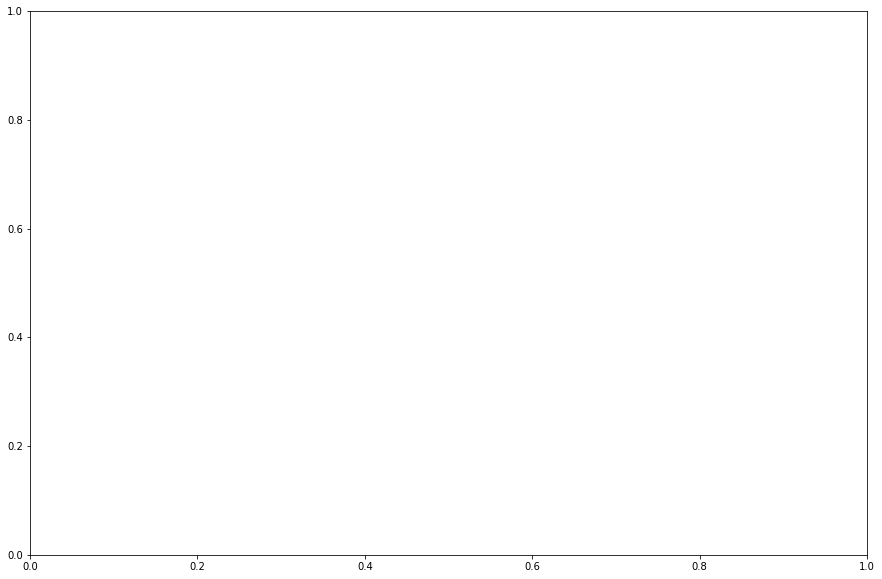

In [223]:
plt.figure(figsize=(15,10))
plt.plot(df_plot['日'], df_plot['aa'],xtiQ!cks=[i for i in range(1, 32)])

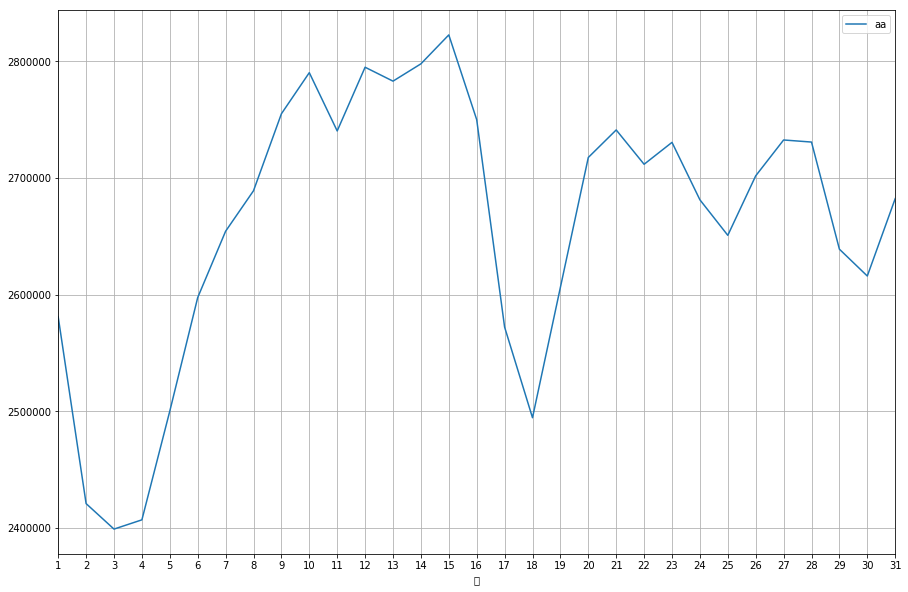

In [115]:
df.groupby(['日']).sum().reset_index()[['日', 'aa']].plot('日', 'aa', grid=True, figsize=(15,10), xticks=[i for i in range(1, 32)])

In [126]:
d

{'东莞': array([[[649.12982911, 335.67751695, 322.24182178, 309.50693312],
         [332.29849282, 299.22010841, 313.95241613, 272.32263986],
         [296.18437525, 279.93736977, 280.15951955, 264.24593406],
         [280.75411666, 268.39367129, 266.8464794 , 255.94118839],
         [268.92908842, 267.05034949, 254.44836478, 248.06453464],
         [267.25855859, 255.34345366, 264.83274713, 258.81878993],
         [299.69234335, 309.78277625, 320.84966811, 350.00791608],
         [791.7696689 , 431.29126289, 450.32550141, 457.73875246],
         [491.01302708, 461.85712149, 465.74867707, 463.58323198],
         [500.72192502, 476.44119443, 483.51132076, 487.96663017],
         [526.74681484, 511.14170813, 494.98287213, 480.71292639],
         [553.6913305 , 542.27255782, 570.73719726, 545.2997358 ],
         [577.75042344, 519.88088096, 497.14535537, 461.54024777],
         [512.65333282, 501.45038081, 494.50349864, 488.64705639],
         [546.03550002, 510.45633218, 485.73071591, 490.

In [129]:
df.to_dict(orient='record')

[{'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 1,
  'num': '00-1',
  'aa': 621,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 2,
  'num': '00-1',
  'aa': 582,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 3,
  'num': '00-1',
  'aa': 588,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 4,
  'num': '00-1',
  'aa': 577,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 5,
  'num': '00-1',
  'aa': 613,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 6,
  'num': '00-1',
  'aa': 605,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 7,
  'num': '00-1',
  'aa': 575,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 8,
  'num': '00-1',
  'aa': 629,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市': '东莞',
  '年': 2020,
  '月': 10,
  '日': 9,
  'num': '00-1',
  'aa': 612,
  'loc': '广东-东莞'},
 {'省': '广东',
  '市':

In [127]:
d['东莞'].shape

(6, 24, 4)

In [157]:
weekdays = [3,4,10,11,17,18,24,25,31]
df['loc'] = df['省'] + '-' + df['市']
dict_ = {loc:i for i, loc in enumerate(set(df['loc']))}
dict_re = {v:k for k, v in dict_.items()}
dict_
model_dict = {}
test_train_split = 25
test_train_start = 5
for hour in range(24):
    for i in range(1, 5):
        time_label = f"{str(hour).zfill(2)}-{i}"
        print(time_label)
        train_test_df = df[df['num']==time_label]
        train_test_df['is_weekend'] = train_test_df['日'].isin(weekdays).astype(int)
        train_test_df['loc'] = train_test_df['loc'].map(dict_)
        train_test_df.rename(columns={'aa':'flow', '日':'day'}, inplace=True)
#         print(train_df)
        train_test_df.drop(['年', '月','省', '市', 'num'], axis=1, inplace=True)
        train_test_df = feature_extraction(train_test_df)
        train_test_df = train_test_df[train_test_df['day']>=test_train_start]
        train_test_y = train_test_df.pop('flow')
        train_x = train_test_df[train_test_df['day']<=test_train_split]
        test_x = train_test_df[train_test_df['day']>test_train_split]
        train_y, test_y = train_test_y[train_test_df['day']<=test_train_split], train_test_y[train_test_df['day']>test_train_split]
#         train_test_df.drop(['flow'], axis=1, inplace=True)
        model = training_xgboost(train_x, train_y)
        pred_y = model.predict(test_x)
#         print(pred_y)
#         print(test_y)
        test_x['pred'] = pred_y
        test_x['flow'] = test_y
        test_x['loc'] = test_x['loc'].map(dict_re)
        test_x['label'] = time_label
        test_x['error'] = test_x['pred']-test_x['flow']
#         print(test_x)
        test_x = test_x[['loc', 'pred', 'flow', 'label', 'day', 'error']]
#         test_x['error'].plot(kind='box')
#         for i, j in zip(pred_y, test_y):
#             print(f"{i}  {j}")
#         print(train_df)
        print(test_x)
#         test_x.to_csv(f'result/{time_label}.csv')
        break
    break

00-1


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

training time: 1s,          loc        pred  flow label  day      error
2400   广东-东莞  646.272522   615  00-1   26  31.272522
2496   广东-东莞  645.196228   655  00-1   27  -9.803772
2592   广东-东莞  649.534485   642  00-1   28   7.534485
2688   广东-东莞  644.311646   681  00-1   29 -36.688354
2784   广东-东莞  666.780823   688  00-1   30 -21.219177
...      ...         ...   ...   ...  ...        ...
62016  广东-韶关  144.071518   143  00-1   27   1.071518
62112  广东-韶关  137.695511   137  00-1   28   0.695511
62208  广东-韶关  141.800537   132  00-1   29   9.800537
62304  广东-韶关  130.204636   154  00-1   30 -23.795364
62400  广东-韶关  162.552841   126  00-1   31  36.552841

[126 rows x 6 columns]


D:\anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is tr

In [47]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.14, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [2]:
results = glob('result/*')
result_df = pd.DataFrame()
for i in results:
    cur_df = pd.read_csv(i)
#     print(cur_df)
    cur_df = cur_df.drop('Unnamed: 0', axis=1)
    result_df = result_df.append(cur_df)
result_df['error'] = result_df['pred']-result_df['flow']
result_df['loc'] = result_df['loc'].apply(lambda x:x.split('-')[1])
result_df

,loc,pred,flow,label,day,error
0,东莞,646.272500,615,00-1,26,31.272500
1,东莞,645.196200,655,00-1,27,-9.803800
2,东莞,649.534500,642,00-1,28,7.534500
3,东莞,644.311650,681,00-1,29,-36.688350
4,东莞,666.780800,688,00-1,30,-21.219200
...,...,...,...,...,...,...
121,韶关,72.283940,73,23-4,27,-0.716060
122,韶关,69.219820,66,23-4,28,3.219820
123,韶关,71.894165,84,23-4,29,-12.105835
124,韶关,68.584920,53,23-4,30,15.584920


In [18]:
print(result_df.groupby(['day', 'label']).sum().columns)
print(result_df.groupby(['day', 'label']).sum().index)
result_df.groupby(['day', 'label']).sum()

Index(['pred', 'flow', 'error'], dtype='object')
MultiIndex([(26, '00-1'),
            (26, '00-2'),
            (26, '00-3'),
            (26, '00-4'),
            (26, '01-1'),
            (26, '01-2'),
            (26, '01-3'),
            (26, '01-4'),
            (26, '02-1'),
            (26, '02-2'),
            ...
            (31, '21-3'),
            (31, '21-4'),
            (31, '22-1'),
            (31, '22-2'),
            (31, '22-3'),
            (31, '22-4'),
            (31, '23-1'),
            (31, '23-2'),
            (31, '23-3'),
            (31, '23-4')],
           names=['day', 'label'], length=576)


pred   flow        error
day label                                  
26  00-1   39842.888644  38872   970.888644
    00-2   19479.405482  19554   -74.594518
    00-3   20470.904172  19267  1203.904172
    00-4   16438.451933  18610 -2171.548067
    01-1   19756.740990  19022   734.740990
...                 ...    ...          ...
31  22-4   23332.324509  24727 -1394.675491
    23-1   23933.673763  25943 -2009.326237
    23-2   23104.876874  24451 -1346.123126
    23-3   21831.135294  23138 -1306.864706
    23-4   23733.259163  20287  3446.259163

[576 rows x 3 columns]

In [180]:
d['东莞']

array([[[649.12982911, 335.67751695, 322.24182178, 309.50693312],
        [332.29849282, 299.22010841, 313.95241613, 272.32263986],
        [296.18437525, 279.93736977, 280.15951955, 264.24593406],
        [280.75411666, 268.39367129, 266.8464794 , 255.94118839],
        [268.92908842, 267.05034949, 254.44836478, 248.06453464],
        [267.25855859, 255.34345366, 264.83274713, 258.81878993],
        [299.69234335, 309.78277625, 320.84966811, 350.00791608],
        [791.7696689 , 431.29126289, 450.32550141, 457.73875246],
        [491.01302708, 461.85712149, 465.74867707, 463.58323198],
        [500.72192502, 476.44119443, 483.51132076, 487.96663017],
        [526.74681484, 511.14170813, 494.98287213, 480.71292639],
        [553.6913305 , 542.27255782, 570.73719726, 545.2997358 ],
        [577.75042344, 519.88088096, 497.14535537, 461.54024777],
        [512.65333282, 501.45038081, 494.50349864, 488.64705639],
        [546.03550002, 510.45633218, 485.73071591, 490.56611621],
        [5

In [182]:
df2

,label,day,loc,pred_tongji
0,00-1,26,东莞,649.129829
1,01-2,26,东莞,335.677517
2,02-3,26,东莞,322.241822
3,03-4,26,东莞,309.506933
4,00-1,26,东莞,332.298493
...,...,...,...,...
12091,03-4,31,韶关,75.208797
12092,00-1,31,韶关,81.898633
12093,01-2,31,韶关,73.844201
12094,02-3,31,韶关,79.848346


In [183]:
result_df

,loc,pred,flow,label,day,error
0,东莞,646.272500,615,00-1,26,31.272500
1,东莞,645.196200,655,00-1,27,-9.803800
2,东莞,649.534500,642,00-1,28,7.534500
3,东莞,644.311650,681,00-1,29,-36.688350
4,东莞,666.780800,688,00-1,30,-21.219200
...,...,...,...,...,...,...
121,韶关,72.283940,73,23-4,27,-0.716060
122,韶关,69.219820,66,23-4,28,3.219820
123,韶关,71.894165,84,23-4,29,-12.105835
124,韶关,68.584920,53,23-4,30,15.584920


In [191]:
record = []
for k, v in d.items():
#     cur_dict = {'市':k}
    for i, day in enumerate(v):
#         cur_dict['day'] = day
        for jq,hour in enumerate(day):
    #         print(hour)
            for jj, j in enumerate(hour):
                label = f"{str(jq).zfill(2)}-{jj+1}"
                cur_dict = {'label':label, 'day': i+26, 'loc':k, 'pred_tongji':j}
                record.append(cur_dict)
df2 = pd.DataFrame(record)
print(df2)
result_df = result_df.merge(df2, on=['day', 'label', 'loc'])
result_df

      label  day loc  pred_tongji
0      00-1   26  东莞   649.129829
1      00-2   26  东莞   335.677517
2      00-3   26  东莞   322.241822
3      00-4   26  东莞   309.506933
4      01-1   26  东莞   332.298493
...     ...  ...  ..          ...
12091  22-4   31  韶关    75.208797
12092  23-1   31  韶关    81.898633
12093  23-2   31  韶关    73.844201
12094  23-3   31  韶关    79.848346
12095  23-4   31  韶关    77.884584

[12096 rows x 4 columns]


,loc,pred,flow,label,day,error,pred_tongji
0,东莞,646.272500,615,00-1,26,31.272500,649.129829
1,东莞,645.196200,655,00-1,27,-9.803800,665.660777
2,东莞,649.534500,642,00-1,28,7.534500,656.300379
3,东莞,644.311650,681,00-1,29,-36.688350,653.648403
4,东莞,666.780800,688,00-1,30,-21.219200,653.296036
...,...,...,...,...,...,...,...
12091,韶关,72.283940,73,23-4,27,-0.716060,67.657430
12092,韶关,69.219820,66,23-4,28,3.219820,66.105431
12093,韶关,71.894165,84,23-4,29,-12.105835,67.843346
12094,韶关,68.584920,53,23-4,30,15.584920,65.677015


In [210]:
result_df['error_2'] = result_df['flow']-result_df['pred_tongji']
result_df['merge_3_7'] = result_df['pred']*0.3 + result_df['pred_tongji']*0.7
result_df['merge_4_6'] = result_df['pred']*0.4 + result_df['pred_tongji']*0.6
result_df['merge_5_5'] = result_df['pred']*0.5 + result_df['pred_tongji']*0.5
result_df['merge_6_4'] = result_df['pred']*0.6 + result_df['pred_tongji']*0.4
result_df['merge_7_3'] = result_df['pred']*0.7 + result_df['pred_tongji']*0.3

result_df['error_3_7'] = abs(result_df['flow']-result_df['merge_3_7'])
result_df['error_4_6'] = abs(result_df['flow']-result_df['merge_4_6'])
result_df['error_5_5'] = abs(result_df['flow']-result_df['merge_5_5'])
result_df['error_6_4'] = abs(result_df['flow']-result_df['merge_6_4'])
result_df['error_7_3'] = abs(result_df['flow']-result_df['merge_7_3'])

result_df['error_2'] = abs(result_df['flow'] - result_df['pred_tongji'])
result_df['error'] = abs(result_df['flow'] - result_df['pred'])

In [214]:
result_df.to_csv('data/result_17.csv')

In [211]:
result_df.mean()

pred           1318.963213
flow           1331.217097
day              28.500000
error            87.946585
pred_tongji    1344.001846
error_2          61.100212
merge_3_7      1336.490256
merge_4_6      1333.986393
merge_5_5      1331.482530
error_3_7        60.680295
error_4_6        62.486720
error_5_5        64.968253
merge_6_4      1328.978666
merge_7_3      1326.474803
error_6_4        68.132685
error_7_3        72.329724
dtype: float64

In [80]:
result_df.to_csv('data/all_result.csv')

In [75]:
result_df = result_df.groupby(['label', 'loc', 'day']).mean().reset_index()
result_df

,label,loc,day,pred,flow,error
0,00-1,广东-东莞,26,646.272500,615,31.272522
1,00-1,广东-东莞,27,645.196200,655,-9.803772
2,00-1,广东-东莞,28,649.534500,642,7.534485
3,00-1,广东-东莞,29,644.311650,681,-36.688354
4,00-1,广东-东莞,30,666.780800,688,-21.219177
...,...,...,...,...,...,...
12091,23-4,广东-韶关,27,72.283940,73,-0.716057
12092,23-4,广东-韶关,28,69.219820,66,3.219818
12093,23-4,广东-韶关,29,71.894165,84,-12.105835
12094,23-4,广东-韶关,30,68.584920,53,15.584923


In [215]:
result_df

,loc,pred,flow,label,day,error,pred_tongji,error_2,merge_3_7,merge_4_6,merge_5_5,error_3_7,error_4_6,error_5_5,merge_6_4,merge_7_3,error_6_4,error_7_3
0,东莞,646.272500,615,00-1,26,31.272500,649.129829,34.129829,648.272630,647.986897,647.701165,33.272630,32.986897,32.701165,647.415432,647.129699,32.415432,32.129699
1,东莞,645.196200,655,00-1,27,9.803800,665.660777,10.660777,659.521404,657.474946,655.428488,4.521404,2.474946,0.428488,653.382031,651.335573,1.617969,3.664427
2,东莞,649.534500,642,00-1,28,7.534500,656.300379,14.300379,654.270615,653.594028,652.917440,12.270615,11.594028,10.917440,652.240852,651.564264,10.240852,9.564264
3,东莞,644.311650,681,00-1,29,36.688350,653.648403,27.351597,650.847377,649.913702,648.980026,30.152623,31.086298,32.019974,648.046351,647.112676,32.953649,33.887324
4,东莞,666.780800,688,00-1,30,21.219200,653.296036,34.703964,657.341465,658.689941,660.038418,30.658535,29.310059,27.961582,661.386894,662.735371,26.613106,25.264629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,韶关,72.283940,73,23-4,27,0.716060,67.657430,5.342570,69.045383,69.508034,69.970685,3.954617,3.491966,3.029315,70.433336,70.895987,2.566664,2.104013
12092,韶关,69.219820,66,23-4,28,3.219820,66.105431,0.105431,67.039748,67.351187,67.662626,1.039748,1.351187,1.662626,67.974064,68.285503,1.974064,2.285503
12093,韶关,71.894165,84,23-4,29,12.105835,67.843346,16.156654,69.058592,69.463674,69.868756,14.941408,14.536326,14.131244,70.273837,70.678919,13.726163,13.321081
12094,韶关,68.584920,53,23-4,30,15.584920,65.677015,12.677015,66.549386,66.840177,67.130967,13.549386,13.840177,14.130967,67.421758,67.712548,14.421758,14.712548


In [77]:
result_df['error'].mean()

-12.25388291217978

In [59]:
result_df.sort_values('error', ascending=False)

,label,loc,Unnamed: 0,pred,flow,day,error
793,09-2,广东-珠海,50293.0,28005.667000,23301.500000,28.5,4704.167318
163,01-4,广东-珠海,50263.0,15180.884833,11869.000000,28.5,3311.884766
226,02-3,广东-珠海,50266.0,14152.546667,11848.666667,28.5,2303.880046
394,04-3,广东-珠海,50274.0,13820.805333,11578.833333,28.5,2241.972005
352,04-1,广东-珠海,50272.0,14300.155333,12141.833333,28.5,2158.322103
...,...,...,...,...,...,...,...
562,06-3,广东-珠海,50282.0,13161.282333,15655.666667,28.5,-2494.384277
730,08-3,广东-珠海,50290.0,19984.216667,22936.166667,28.5,-2951.949870
814,09-3,广东-珠海,50294.0,21309.392500,24306.666667,28.5,-2997.274089
835,09-4,广东-珠海,50295.0,20604.749167,23851.666667,28.5,-3246.917643


In [ ]:

年	月	日	num	aa
0	2020	10	1	00-1	10581
1	2020	10	1	00-2	2675
2	2020	10	1	00-3	1218

In [34]:
cur_df_3g

,年,月,日,时间,aa,国家,省,市,经度,纬度,b,aaa,age,type
0,2020,9,30,22-15-23,-1129586437,中国,广东,珠海,113.513533,22.274475,-144444909,F,27.0,苹果
1,2020,9,30,23-08-02,-590601537,中国,广东,中山,113.511506,22.223284,-1626971814,M,32.0,小米
2,2020,9,30,23-43-35,-1740997739,中国,广东,广州,113.563750,22.284632,-153712877,M,28.0,苹果
3,2020,9,30,23-45-58,460401857,中国,广东,珠海,113.264030,22.168390,-142749215,M,24.0,欧珀
4,2020,9,30,23-50-51,-426000723,中国,广东,珠海,113.524486,22.199903,-157543388,F,49.0,欧珀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,10,1,00-01-17,-1604971004,中国,广东,广州,113.310790,22.191430,-156558212,F,21.0,苹果
996,2020,10,1,00-01-17,-977021750,中国,广东,珠海,113.542222,22.258889,-153846376,M,58.0,三星
997,2020,10,1,00-01-17,-396202109,中国,广东,珠海,113.523340,22.406670,-154727268,F,41.0,苹果
998,2020,10,1,00-01-17,388000140,中国,广东,珠海,113.308300,22.108300,-143661640,F,51.0,小米


In [72]:
df.to_csv('jizhan_num1.csv', index=False)

In [42]:
df

,年,月,日,时间,aa,国家,省,市,经度,纬度,b,aaa,age,type,id,hour,min,sec,num
0,2020,9,30,22-15-23,-1129586437,中国,广东,珠海,113.513533,22.274475,-144444909,F,27.0,苹果,0,22,15,23,22-1
1,2020,9,30,23-08-02,-590601537,中国,广东,中山,113.511506,22.223284,-1626971814,M,32.0,小米,1,23,08,02,23-1
2,2020,9,30,23-43-35,-1740997739,中国,广东,广州,113.563750,22.284632,-153712877,M,28.0,苹果,2,23,43,35,23-3
3,2020,9,30,23-45-58,460401857,中国,广东,珠海,113.264030,22.168390,-142749215,M,24.0,欧珀,3,23,45,58,23-3
4,2020,9,30,23-50-51,-426000723,中国,广东,珠海,113.524486,22.199903,-157543388,F,49.0,欧珀,4,23,50,51,23-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,10,1,00-01-17,-1604971004,中国,广东,广州,113.310790,22.191430,-156558212,F,21.0,苹果,995,00,01,17,00-1
996,2020,10,1,00-01-17,-977021750,中国,广东,珠海,113.542222,22.258889,-153846376,M,58.0,三星,996,00,01,17,00-1
997,2020,10,1,00-01-17,-396202109,中国,广东,珠海,113.523340,22.406670,-154727268,F,41.0,苹果,997,00,01,17,00-1
998,2020,10,1,00-01-17,388000140,中国,广东,珠海,113.308300,22.108300,-143661640,F,51.0,小米,998,00,01,17,00-1


In [3]:
def pre_process(df):
    df = df.dropna()
    df_sub_time = df['时间'].str.split('-', expand=True)
    df_sub_time.columns = ['hour', 'min', 'sec']
    df = pd.concat([df, df_sub_time], 1)
    return df

def get_data(df):
    grouped = df.groupby(['年', '月', '日', 'hour'])
    dict_ = {}
    for a, b in grouped:
        time = '-'.join([str(i) for i in a])
        dict_[time] = (b.count()[0])
    return dict_

In [4]:
all_dict = {}
for file_name in file_names:
    df = pd.read_csv(file_name, delimiter='\t', names=['年', '月', '日', '时间', 'aa', '国家', '省', '市', '经度', '纬度', 'b', 'aaa', 'age', 'type'])
    df = pre_process(df)
    dict_= get_data(df)
    all_dict.update(dict_)
all_dict

{'2020-9-30-21': 5,
 '2020-9-30-22': 16,
 '2020-9-30-23': 11568,
 '2020-10-1-00': 293066,
 '2020-10-1-01': 272486,
 '2020-10-1-02': 261522,
 '2020-10-1-03': 255487,
 '2020-10-1-04': 246572,
 '2020-10-1-05': 247885,
 '2020-10-1-06': 258797,
 '2020-10-1-07': 295453,
 '2020-10-1-08': 349063,
 '2020-10-1-09': 444937,
 '2020-10-1-10': 438121,
 '2020-10-1-11': 443910,
 '2020-10-1-12': 420476,
 '2020-10-1-13': 394180,
 '2020-10-1-14': 383479,
 '2020-10-1-15': 381668,
 '2020-10-1-16': 399213,
 '2020-10-1-17': 417348,
 '2020-10-1-18': 415755,
 '2020-10-1-19': 403388,
 '2020-10-1-20': 2,
 '2020-10-1-21': 2,
 '2020-10-1-22': 14,
 '2020-10-1-23': 11208,
 '2020-10-2-00': 264388,
 '2020-10-2-01': 247135,
 '2020-10-2-02': 231868,
 '2020-10-2-03': 224313,
 '2020-10-2-04': 216424,
 '2020-10-2-05': 220433,
 '2020-10-2-06': 229095,
 '2020-10-2-07': 261241,
 '2020-10-2-08': 309781,
 '2020-10-2-09': 356544,
 '2020-10-2-10': 383442,
 '2020-10-2-11': 395317,
 '2020-10-2-12': 383391,
 '2020-10-2-13': 372457,


In [5]:
all_dict.pop('2020-9-30-21')
all_dict.pop('2020-9-30-22')
all_dict.pop('2020-9-30-23')

11568

In [6]:
all_dict

{'2020-10-1-00': 293066,
 '2020-10-1-01': 272486,
 '2020-10-1-02': 261522,
 '2020-10-1-03': 255487,
 '2020-10-1-04': 246572,
 '2020-10-1-05': 247885,
 '2020-10-1-06': 258797,
 '2020-10-1-07': 295453,
 '2020-10-1-08': 349063,
 '2020-10-1-09': 444937,
 '2020-10-1-10': 438121,
 '2020-10-1-11': 443910,
 '2020-10-1-12': 420476,
 '2020-10-1-13': 394180,
 '2020-10-1-14': 383479,
 '2020-10-1-15': 381668,
 '2020-10-1-16': 399213,
 '2020-10-1-17': 417348,
 '2020-10-1-18': 415755,
 '2020-10-1-19': 403388,
 '2020-10-1-20': 2,
 '2020-10-1-21': 2,
 '2020-10-1-22': 14,
 '2020-10-1-23': 11208,
 '2020-10-2-00': 264388,
 '2020-10-2-01': 247135,
 '2020-10-2-02': 231868,
 '2020-10-2-03': 224313,
 '2020-10-2-04': 216424,
 '2020-10-2-05': 220433,
 '2020-10-2-06': 229095,
 '2020-10-2-07': 261241,
 '2020-10-2-08': 309781,
 '2020-10-2-09': 356544,
 '2020-10-2-10': 383442,
 '2020-10-2-11': 395317,
 '2020-10-2-12': 383391,
 '2020-10-2-13': 372457,
 '2020-10-2-14': 364858,
 '2020-10-2-15': 368187,
 '2020-10-2-16'

In [17]:
for k, v in all_dict.items():
    print(k, v)
    print(type(k), type(v))
    break

2020-10-1-00 293066
<class 'str'> <class 'numpy.int64'>


In [18]:
import json

with open('a.json', 'w') as f:
    f.write(json.dumps({k: int(v) for k, v in all_dict.items()}))

In [1]:
import json

with open('a.json', 'r') as f:
    all_dict = json.load(f)

In [134]:
all_dict.keys()

dict_keys(['2020-10-1-00', '2020-10-1-01', '2020-10-1-02', '2020-10-1-03', '2020-10-1-04', '2020-10-1-05', '2020-10-1-06', '2020-10-1-07', '2020-10-1-08', '2020-10-1-09', '2020-10-1-10', '2020-10-1-11', '2020-10-1-12', '2020-10-1-13', '2020-10-1-14', '2020-10-1-15', '2020-10-1-16', '2020-10-1-17', '2020-10-1-18', '2020-10-1-19', '2020-10-1-20', '2020-10-1-21', '2020-10-1-22', '2020-10-1-23', '2020-10-2-00', '2020-10-2-01', '2020-10-2-02', '2020-10-2-03', '2020-10-2-04', '2020-10-2-05', '2020-10-2-06', '2020-10-2-07', '2020-10-2-08', '2020-10-2-09', '2020-10-2-10', '2020-10-2-11', '2020-10-2-12', '2020-10-2-13', '2020-10-2-14', '2020-10-2-15', '2020-10-2-16', '2020-10-2-17', '2020-10-2-18', '2020-10-2-19', '2020-10-2-20', '2020-10-2-21', '2020-10-2-22', '2020-10-2-23', '2020-10-3-00', '2020-10-3-01', '2020-10-3-02', '2020-10-3-03', '2020-10-3-04', '2020-10-3-05', '2020-10-3-06', '2020-10-3-07', '2020-10-3-08', '2020-10-3-09', '2020-10-3-10', '2020-10-3-11', '2020-10-3-12', '2020-10-3-13

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


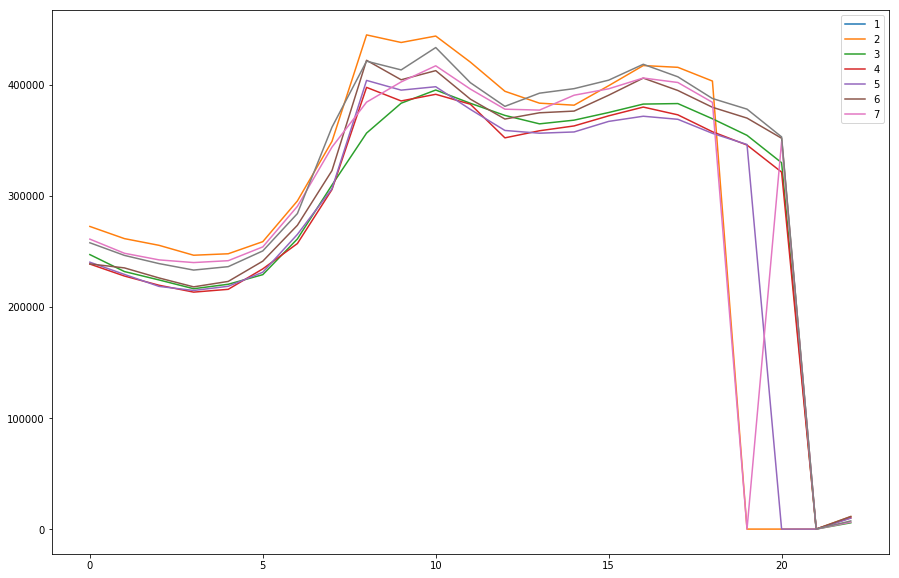

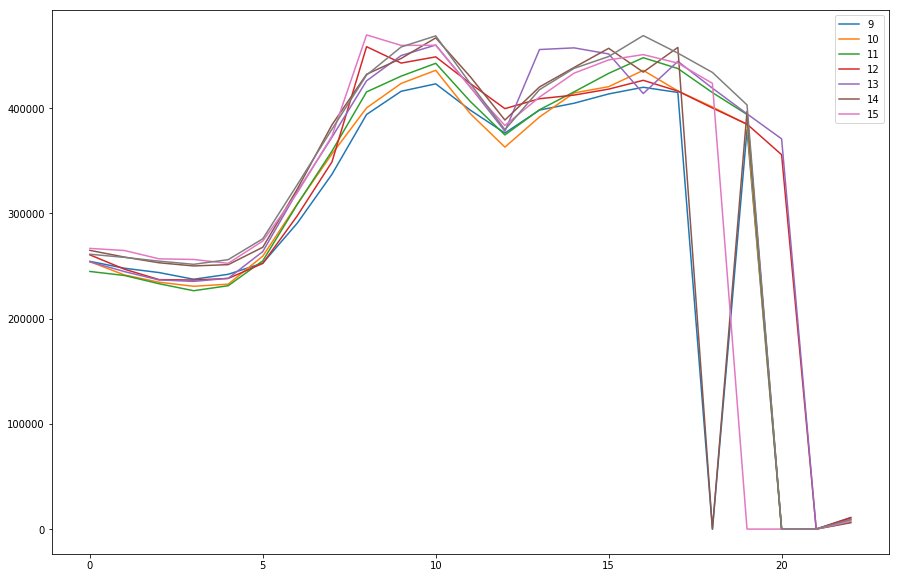

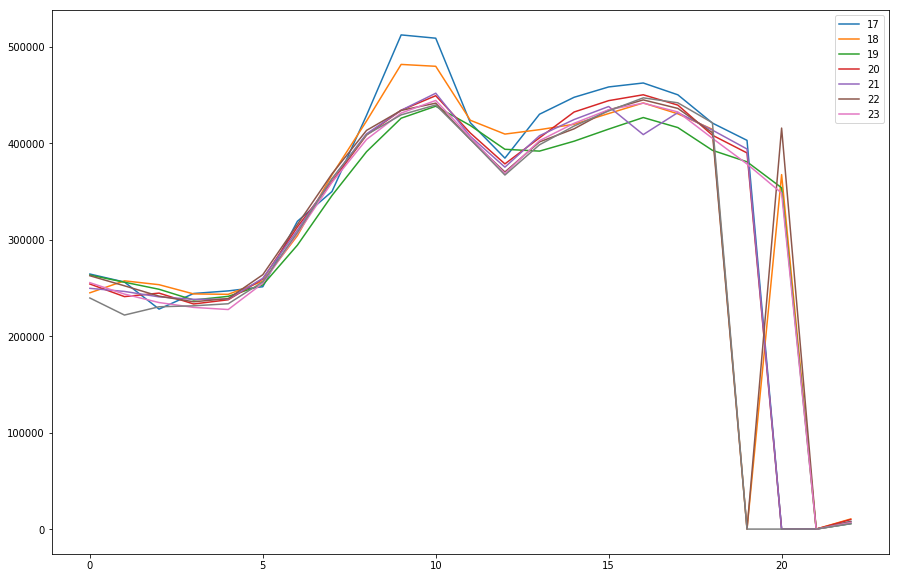

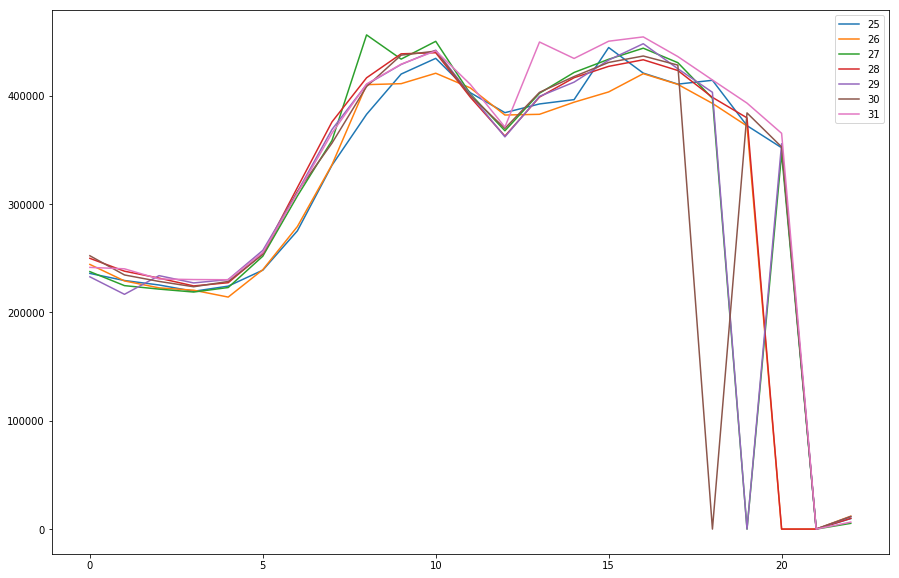

In [136]:
plt.figure(figsize=(15,10))  # 3,4,10号是周六日 
last_day = 0
days = []
for k, v in all_dict.items():
    day = int(k.split('-')[2])
#     if int(day)>7:
#         break
#         plt.figure()
    if day == last_day:
        days.append(v)
#     elif int(day) > last_day:
    else:
        plt.plot(days, label=f"{day}")
#         print(len(days))
        if day %8 ==0:
            plt.figure(figsize=(15,10)) 
        days = []
        last_day = day
        plt.legend()

plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8394227 entries, 0 to 8593664
Data columns (total 17 columns):
年       int64
月       int64
日       int64
时间      object
aa      int64
国家      object
省       object
市       object
经度      float64
纬度      float64
b       int64
aaa     object
age     float64
type    object
hour    object
min     object
sec     object
dtypes: float64(3), int64(5), object(9)
memory usage: 1.1+ GB


In [16]:
help(df['时间'].str.split)

Help on method split in module pandas.core.strings:

split(pat=None, n=-1, expand=False) method of pandas.core.strings.StringMethods instance
    Split strings around given separator/delimiter.
    
    Splits the string in the Series/Index from the beginning,
    at the specified delimiter string. Equivalent to :meth:`str.split`.
    
    Parameters
    ----------
    pat : str, optional
        String or regular expression to split on.
        If not specified, split on whitespace.
    n : int, default -1 (all)
        Limit number of splits in output.
        ``None``, 0 and -1 will be interpreted as return all splits.
    expand : bool, default False
        Expand the splitted strings into separate columns.
    
        * If ``True``, return DataFrame/MultiIndex expanding dimensionality.
        * If ``False``, return Series/Index, containing lists of strings.
    
    Returns
    -------
    Series, Index, DataFrame or MultiIndex
        Type matches caller unless ``expand=True``

In [5]:
df_sub_time = df['时间'].str.split('-', expand=True)
df_sub_time.columns = ['hour', 'min', 'sec']

In [6]:
df_sub_time

,hour,min,sec
0,22,15,23
1,23,08,02
2,23,43,35
3,23,45,58
4,23,50,51
...,...,...,...
8582000,23,57,36
8582001,23,57,37
8582002,23,57,47
8582003,23,58,04


In [7]:
df = pd.concat([df, df_sub_time], 1)
df

,年,月,日,时间,aa,国家,省,市,经度,纬度,b,aaa,age,type,hour,min,sec
0,2020,9,30,22-15-23,-1129586437,中国,广东,珠海,113.513533,22.274475,-144444909,F,27.0,苹果,22,15,23
1,2020,9,30,23-08-02,-590601537,中国,广东,中山,113.511506,22.223284,-1626971814,M,32.0,小米,23,08,02
2,2020,9,30,23-43-35,-1740997739,中国,广东,广州,113.563750,22.284632,-153712877,M,28.0,苹果,23,43,35
3,2020,9,30,23-45-58,460401857,中国,广东,珠海,113.264030,22.168390,-142749215,M,24.0,欧珀,23,45,58
4,2020,9,30,23-50-51,-426000723,中国,广东,珠海,113.524486,22.199903,-157543388,F,49.0,欧珀,23,50,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8582000,2020,10,1,23-57-36,1530333029,中国,广东,珠海,113.495017,22.227028,1103476025,F,28.0,维沃,23,57,36
8582001,2020,10,1,23-57-37,63819803,中国,广东,珠海,113.135920,22.177190,-143610798,M,58.0,聆韵,23,57,37
8582002,2020,10,1,23-57-47,-279687245,中国,广东,珠海,113.294550,22.093260,-143691425,F,29.0,苹果,23,57,47
8582003,2020,10,1,23-58-04,1401294554,中国,广东,珠海,113.587515,22.247655,1103446697,M,32.0,苹果,23,58,04


In [8]:
grouped = df.groupby(['年', '月', '日', 'hour'])

In [9]:
grouped

In [13]:
for a, b in grouped:
    print(a)
    print(type(a))
    print(len(a))
    print(b.count()[0])
    break

(2020, 9, 30, '21')
<class 'tuple'>
4
5


In [38]:
df.describe()

,年,月,日,aa,经度,纬度,b,age
count,200.0,200.0,200.0,2.000000e+02,198.000000,198.000000,2.000000e+02,197.000000
mean,2020.0,9.0,30.0,-8.189141e+07,113.426032,22.209297,5.468384e+07,37.802030
std,0.0,0.0,0.0,1.095680e+09,0.128117,0.069290,5.061560e+08,12.010047
min,2020.0,9.0,30.0,-2.119506e+09,113.114860,21.892800,-1.626976e+09,17.000000
25%,2020.0,9.0,30.0,-9.770259e+08,113.309265,22.177135,-1.537310e+08,28.000000
50%,2020.0,9.0,30.0,-1.923533e+08,113.494012,22.225510,-1.480078e+08,35.000000
75%,2020.0,9.0,30.0,4.628836e+08,113.538177,22.246023,-1.427593e+08,47.000000
max,2020.0,9.0,30.0,2.002828e+09,113.603200,22.386030,1.103871e+09,79.000000


In [46]:
df['经度'].isnull().value_counts()

False    195
Name: 经度, dtype: int64

In [45]:
df

,年,月,日,时间,aa,国家,省,市,经度,纬度,b,aaa,age,type,hour,min,sec,hour,min,sec
0,2020,9,30,22-15-23,-1129586437,中国,广东,珠海,113.513533,22.274475,-144444909,F,27.0,苹果,22,15,23,22,15,23
1,2020,9,30,23-08-02,-590601537,中国,广东,中山,113.511506,22.223284,-1626971814,M,32.0,小米,23,08,02,23,08,02
2,2020,9,30,23-43-35,-1740997739,中国,广东,广州,113.563750,22.284632,-153712877,M,28.0,苹果,23,43,35,23,43,35
3,2020,9,30,23-45-58,460401857,中国,广东,珠海,113.264030,22.168390,-142749215,M,24.0,欧珀,23,45,58,23,45,58
4,2020,9,30,23-50-51,-426000723,中国,广东,珠海,113.524486,22.199903,-157543388,F,49.0,欧珀,23,50,51,23,50,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020,9,30,23-58-29,1515590284,中国,广东,广州,113.539490,22.242390,-152351651,F,32.0,苹果,23,58,29,23,58,29
196,2020,9,30,23-58-29,1995399880,中国,广东,广州,113.525630,22.242410,-151943145,M,63.0,苹果,23,58,29,23,58,29
197,2020,9,30,23-58-30,-739097027,中国,广东,珠海,113.462220,22.210740,-157522786,M,33.0,魅族,23,58,30,23,58,30
198,2020,9,30,23-58-30,-393078376,中国,广东,珠海,113.190770,22.233230,1103746899,M,49.0,金立,23,58,30,23,58,30
